In [5]:
# imports
import panel as pn
import dash
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from dotenv import load_dotenv, find_dotenv
import plotnine as p9
import os
import warnings
from scipy import linalg, optimize
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
# Load .env enviroment variables (find_dotenv is required on my computer)
load_dotenv(find_dotenv('api_keys.env'))
map_box_api = os.getenv("MAPBOX_API_KEY")

In [7]:
# Create path and dataframe
cocoa_production_path = Path('/Users', 'tylerhubbard', 'umnfintech', 'project1_group3', 'Resources', 'cocoa-bean-production.csv')
production_df = pd.read_csv(cocoa_production_path, infer_datetime_format=True, parse_dates=True)
production_df = production_df.set_index(['Entity', 'Year'])
production_df = production_df.drop(columns=('Code'))
production_df

Crops (tonnes)
Entity        Year                 
Cameroon      2010           264077
              2011           240000
              2012           268941
              2013           275000
              2014           271297
              2015           274939
              2016           293169
              2017           300511
              2018           307867
Cote d'Ivoire 2010          1301347
              2011          1511255
              2012          1485882
              2013          1448992
              2014          1617841
              2015          1796000
              2016          1634000
              2017          2034000
              2018          1963949
Ecuador       2010           132099
              2011           224163
              2012           133323
              2013           128446
              2014           156216
              2015           180192
              2016           177551
              2017           205955
              2018           235182
Ghana         2010           632037
              2011           700020
              2012           879348
              2013           835466
              2014           858720
              2015           858720
              2016           858720
              2017           893598
              2018           947632
Nigeria       2010           399200
              2011           391000
              2012           383000
              2013           367000
              2014           329870
              2015           302066
              2016           298029
              2017           324391
              2018           332927

<AxesSubplot:title={'center':'Crop Production Data by Country and Year'}, xlabel='Entity,Year', ylabel='Production in Tonnes by Million'>

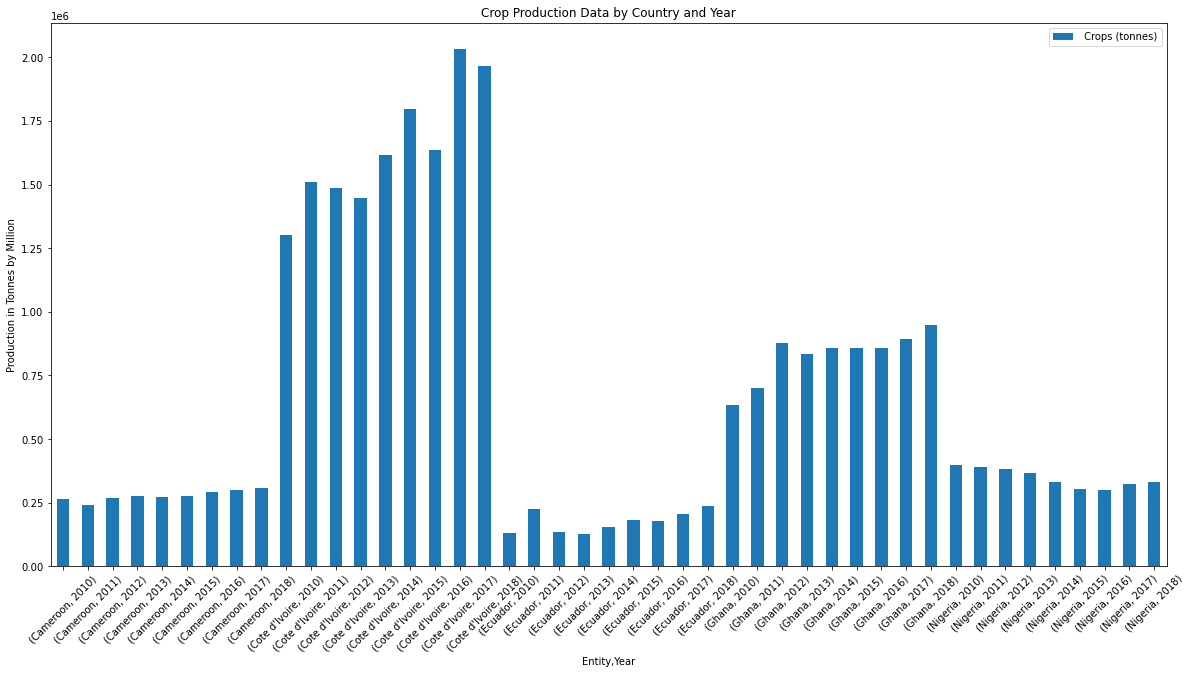

In [8]:
# Plot whole dataframe
production_df_plot = production_df.plot(kind='bar', figsize=(20,10), title='Crop Production Data by Country and Year',
                  ylabel='Production in Tonnes by Million', rot=45)
production_df_plot

In [9]:
# Create second dataframe with only Year as the index
production_df2 = pd.read_csv(cocoa_production_path, infer_datetime_format=True, parse_dates=True)
production_df2 = production_df2.set_index(['Year'])
production_df2 = production_df2.drop(columns=('Code'))

# Determine mean
production_mean = production_df2.groupby(by=['Year'], dropna=False).mean()
production_mean

,Crops (tonnes)
Year,
2010,545752.0
2011,613287.6
2012,630098.8
2013,610980.8
2014,646788.8
2015,682383.4
2016,652293.8
2017,751691.0
2018,757511.4


<AxesSubplot:title={'center':'Average Values of Production by Year'}, xlabel='Year', ylabel='Production in Tonnes'>

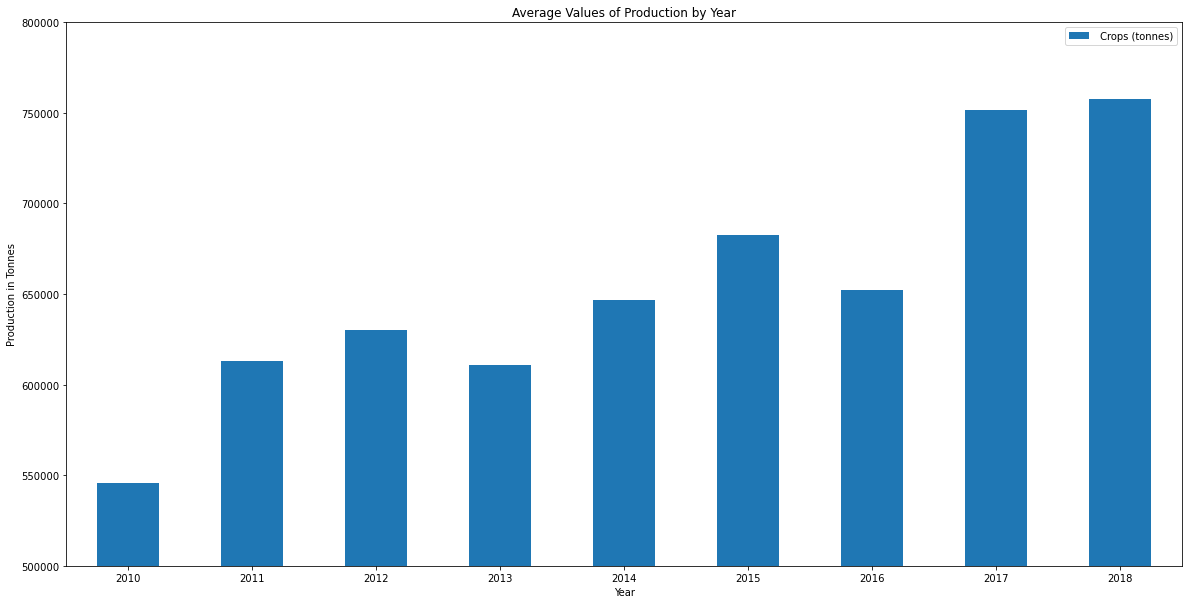

In [10]:
# Plot production mean
production_mean_plot = production_mean.plot(kind='bar', figsize=(20,10), title='Average Values of Production by Year',
                                           rot=0, ylabel='Production in Tonnes',
                                           ylim=(500000, 800000))
production_mean_plot

In [11]:
# Determine min, max, std
production_min = production_df2.groupby(by=['Year']).min()
production_min = production_min.drop(columns=('Entity'))
production_max = production_df2.groupby(by=['Year']).max()
production_max = production_max.drop(columns=('Entity'))
production_std = production_df2.groupby(by=['Year']).std()

In [12]:
# Check min values
production_min

,Crops (tonnes)
Year,
2010,132099
2011,224163
2012,133323
2013,128446
2014,156216
2015,180192
2016,177551
2017,205955
2018,235182


<AxesSubplot:title={'center':'Minimum Values of Production by Year'}, xlabel='Year', ylabel='Production in Tonnes'>

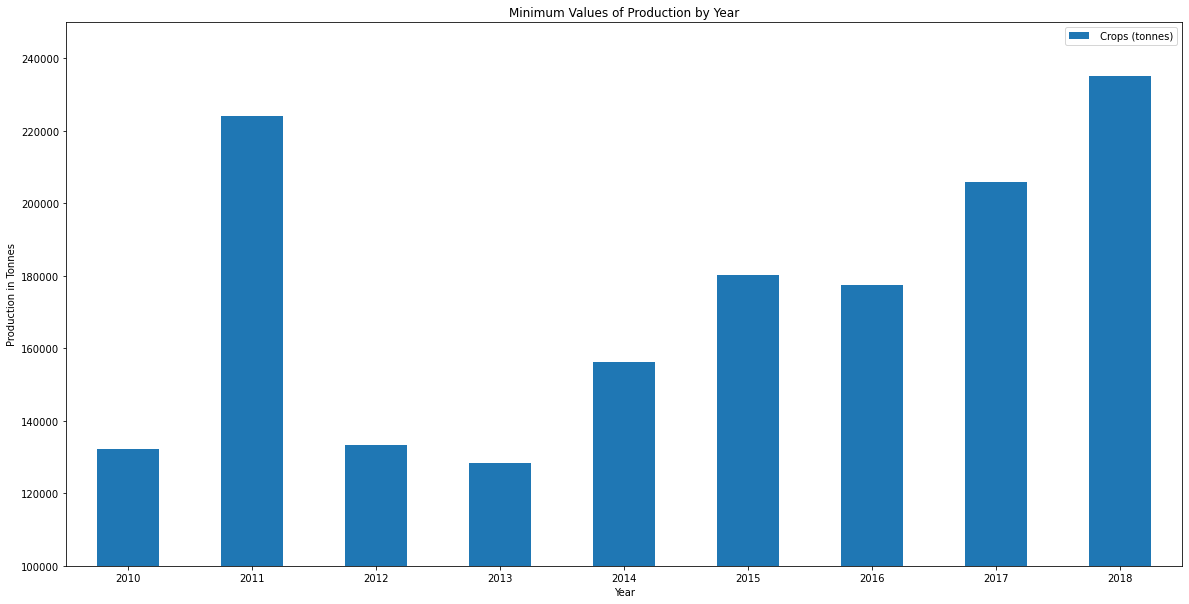

In [13]:
# Plot min values
production_min_plot = production_min.plot(kind='bar', figsize=(20,10), 
                                          title='Minimum Values of Production by Year',
                                         rot=0, ylabel='Production in Tonnes',
                                         ylim=(100000, 250000))
production_min_plot

In [14]:
# Check max values
production_max

,Crops (tonnes)
Year,
2010,1301347
2011,1511255
2012,1485882
2013,1448992
2014,1617841
2015,1796000
2016,1634000
2017,2034000
2018,1963949


<AxesSubplot:title={'center':'Max Values of Production by Year'}, xlabel='Year', ylabel='Production in Tonnes'>

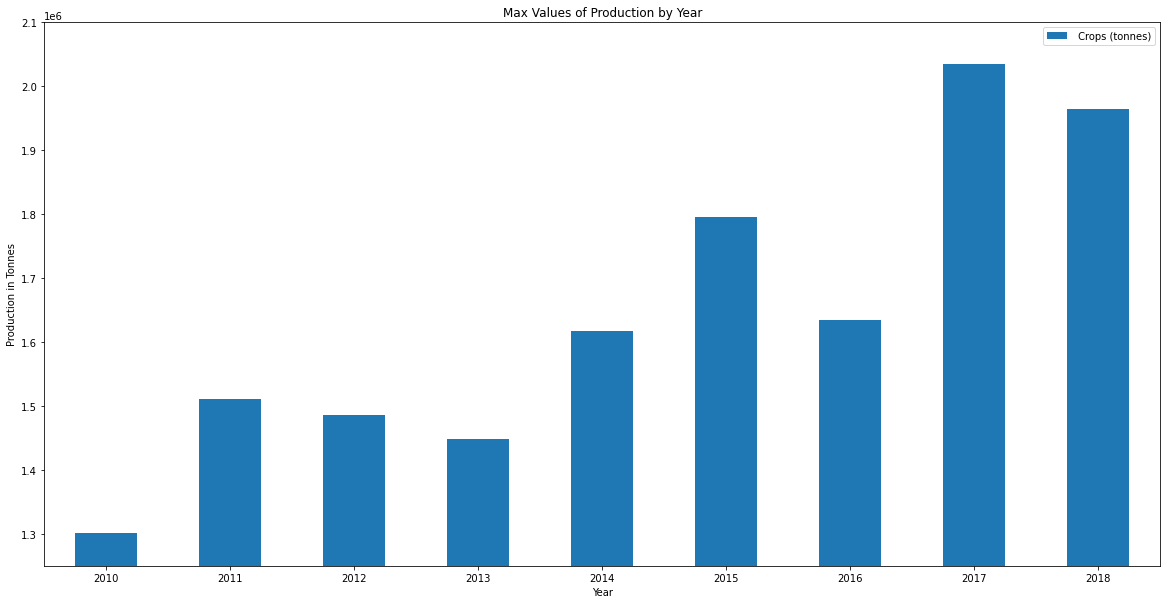

In [15]:
# Plot max values
production_max_plot = production_max.plot(kind='bar', figsize=(20,10), 
                                         title='Max Values of Production by Year',
                                         rot=0, ylabel='Production in Tonnes',
                                         ylim=(1250000, 2100000))
production_max_plot

In [16]:
# Check std values, ensure float is set to two decimals
pd.options.display.float_format = "{:,.2f}".format
production_std

,Crops (tonnes)
Year,
2010,"461,057.48"
2011,"537,131.58"
2012,"555,150.66"
2013,"538,030.19"
2014,"606,207.58"
2015,"677,141.97"
2016,"609,551.83"
2017,"766,229.47"
2018,"732,618.17"


<AxesSubplot:title={'center':'Standard Deviation in Production by Year'}, xlabel='Year', ylabel='Production in Tonnes'>

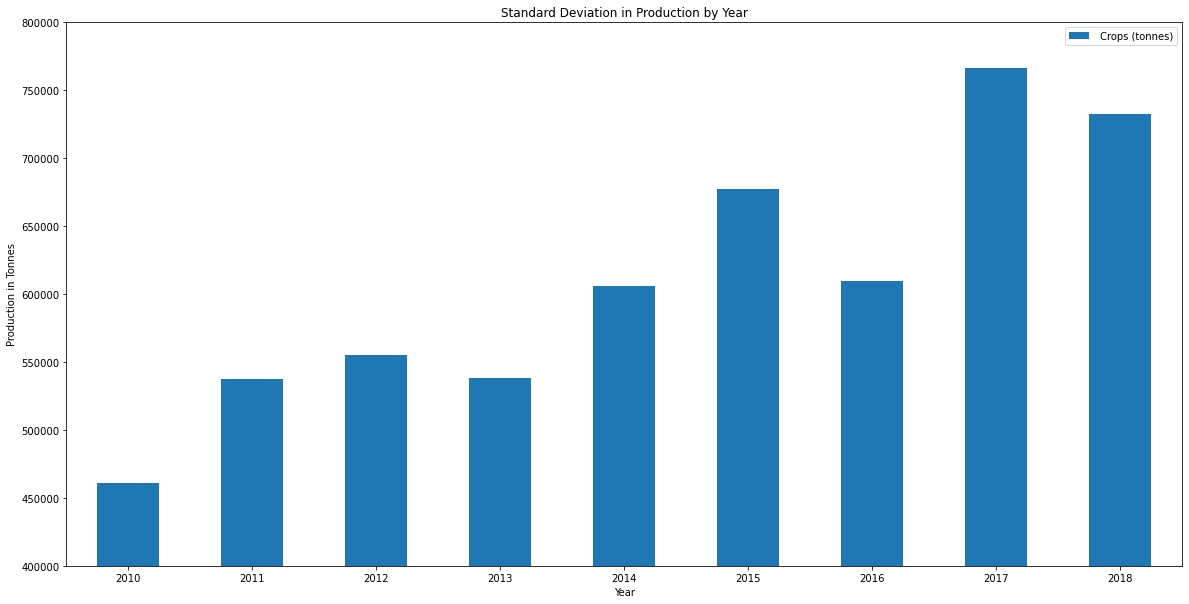

In [17]:
# Plot std values
production_std_plot = production_std.plot(kind='bar', figsize=(20,10),
                                          title='Standard Deviation in Production by Year',
                                          rot=0, ylabel='Production in Tonnes',
                                         ylim=(400000, 800000))
production_std_plot

In [18]:
area_path = Path('/Users', 'tylerhubbard', 'umnfintech', 'project1_group3', 'Resources', 'fao_area.csv')
fao_area = pd.read_csv(area_path, index_col=['Area', 'Year'])
fao_area = fao_area.drop(columns=['Domain Code', 'Domain', 'Area Code (FAO)', 'Element Code', 'Item Code (FAO)',
                                  'Item', 'Year Code', 'Flag', 'Flag Description', 'Element', 'Unit'])
fao_area

Value
Area          Year         
Cameroon      2010   670000
              2011   670000
              2012   670000
              2013   670000
              2014   714261
              2015   767555
              2016   520947
              2017   599844
              2018   606649
Côte d'Ivoire 2010  2278786
              2011  2685121
              2012  2746080
              2013  2731411
              2014  3084498
              2015  3458163
              2016  3168749
              2017  4035466
              2018  4359104
Ecuador       2010   360025
              2011   399467
              2012   390176
              2013   402434
              2014   372637
              2015   432094
              2016   454257
              2017   467327
              2018   501950
Ghana         2010  1600200
              2011  1600300
              2012  1600300
              2013  1600300
              2014  1683765
              2015  1683765
              2016  1683765
              2017  1867648
              2018  1707146
Nigeria       2010  1272430
              2011  1241329
              2012  1266347
              2013  1239750
              2014  1144659
              2015  1056893
              2016  1048945
              2017  1154654
              2018  1222844

<AxesSubplot:title={'center':'Area Harvested (in million ha) by Area and Year from 2010-2018'}, xlabel='Area,Year', ylabel='Area in millions of ha'>

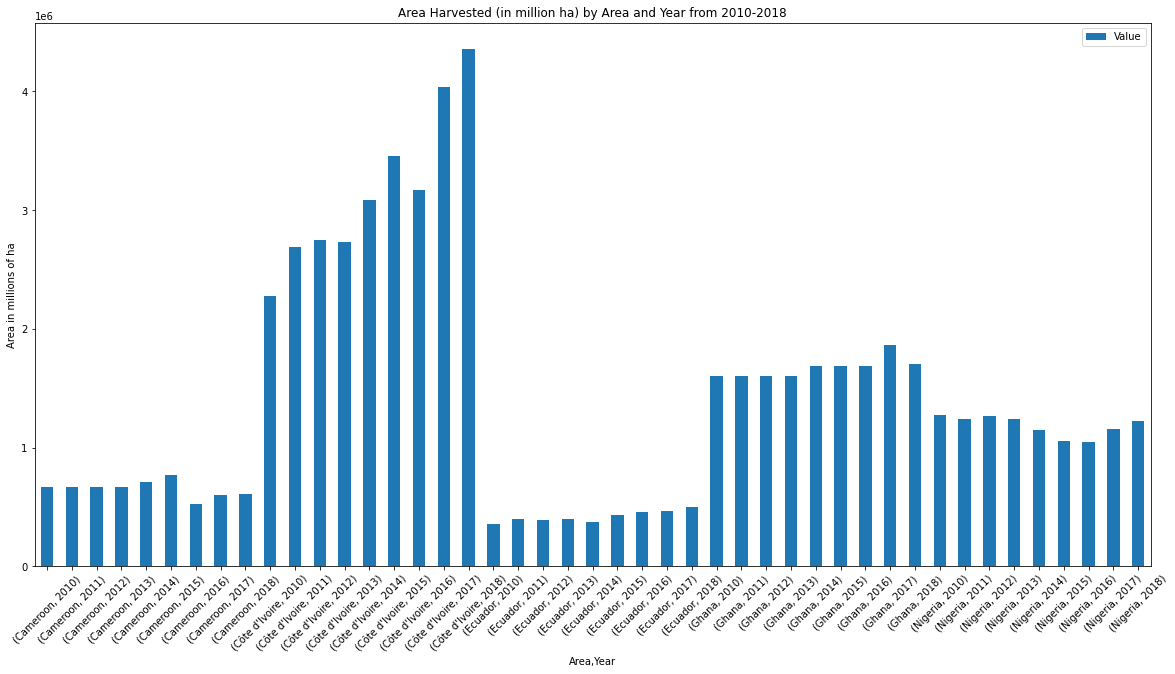

In [19]:
fao_area_plot = fao_area.plot(kind='bar', figsize=(20,10), title='Area Harvested (in million ha) by Area and Year from 2010-2018',
             ylabel='Area in millions of ha', rot=45)
fao_area_plot

In [20]:
area_harvested_mean = fao_area.groupby(by=['Year'], dropna=False).mean()
area_harvested_min = fao_area.groupby(by=['Year'], dropna=False).min()
area_harvested_max = fao_area.groupby(by=['Year'], dropna=False).max()
area_harvested_std = fao_area.groupby(by=['Year'], dropna=False).std()

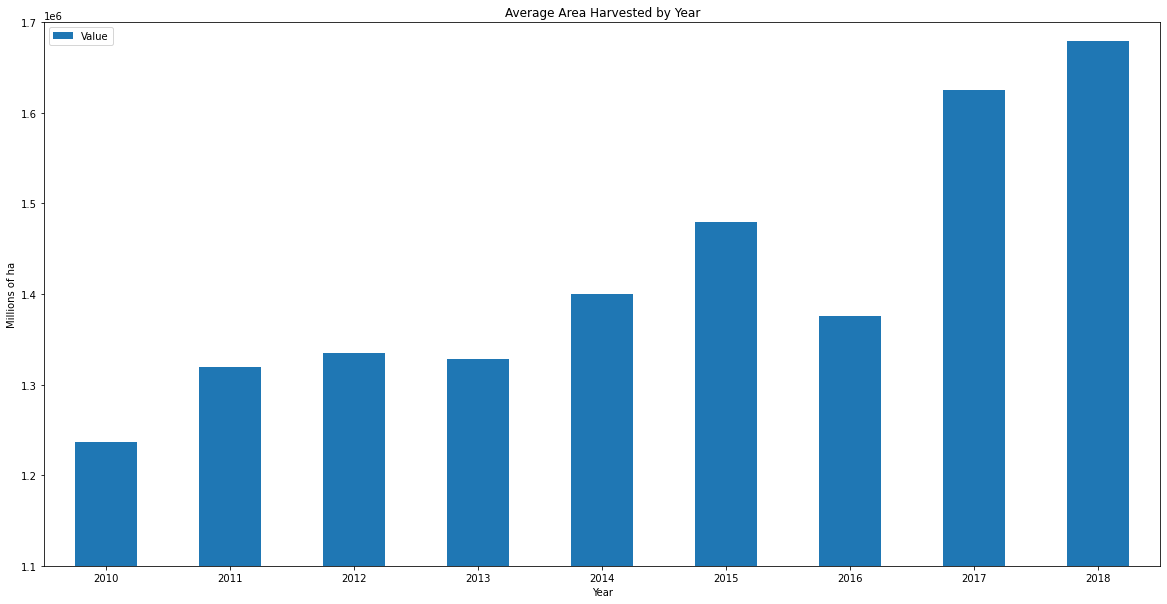

In [21]:
area_harvested_mean_plot = area_harvested_mean.plot(kind='bar', figsize=(20,10), ylim=(1100000, 1700000),
                                                   title='Average Area Harvested by Year', ylabel='Millions of ha',
                                                   rot=0)

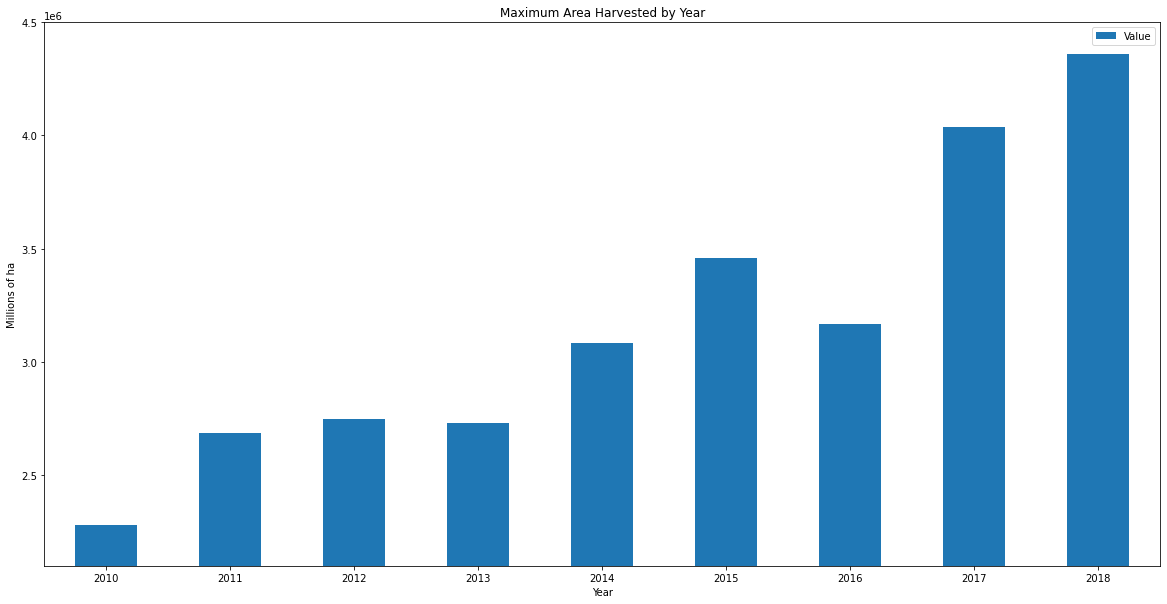

In [22]:
area_harvested_max_plot = area_harvested_max.plot(kind='bar', figsize=(20,10), title='Maximum Area Harvested by Year',
                                                 ylim=(2100000, 4500000), rot=0, ylabel='Millions of ha')

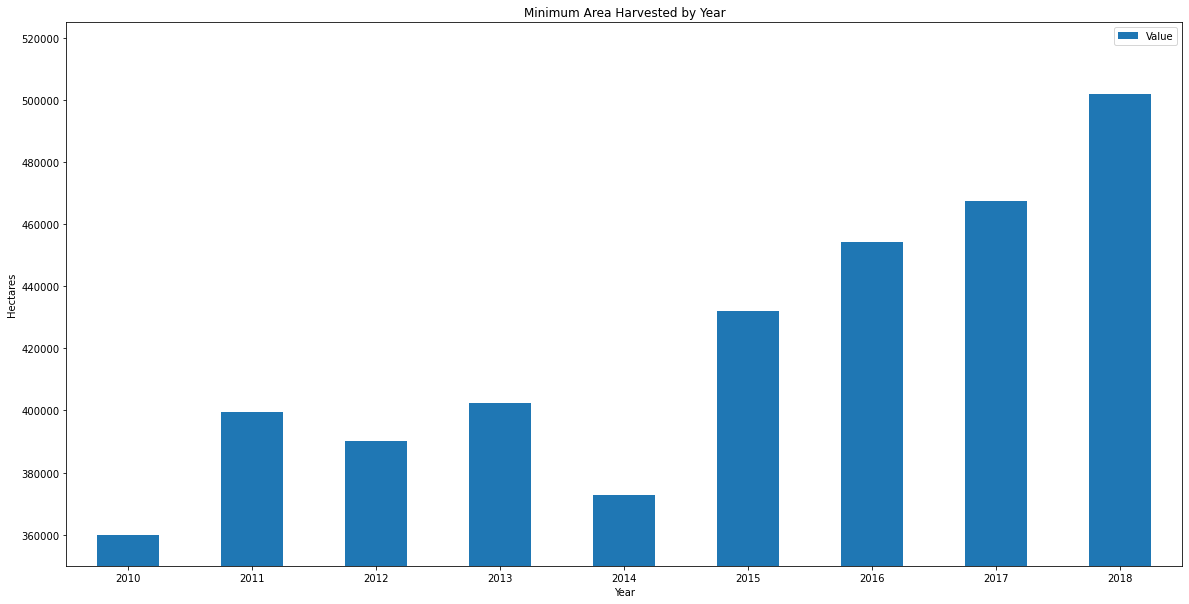

In [23]:
area_harvested_min_plot = area_harvested_min.plot(kind='bar', figsize=(20,10), rot=0,
                                                  title='Minimum Area Harvested by Year', ylabel='Hectares',
                                                  ylim=(350000, 525000))

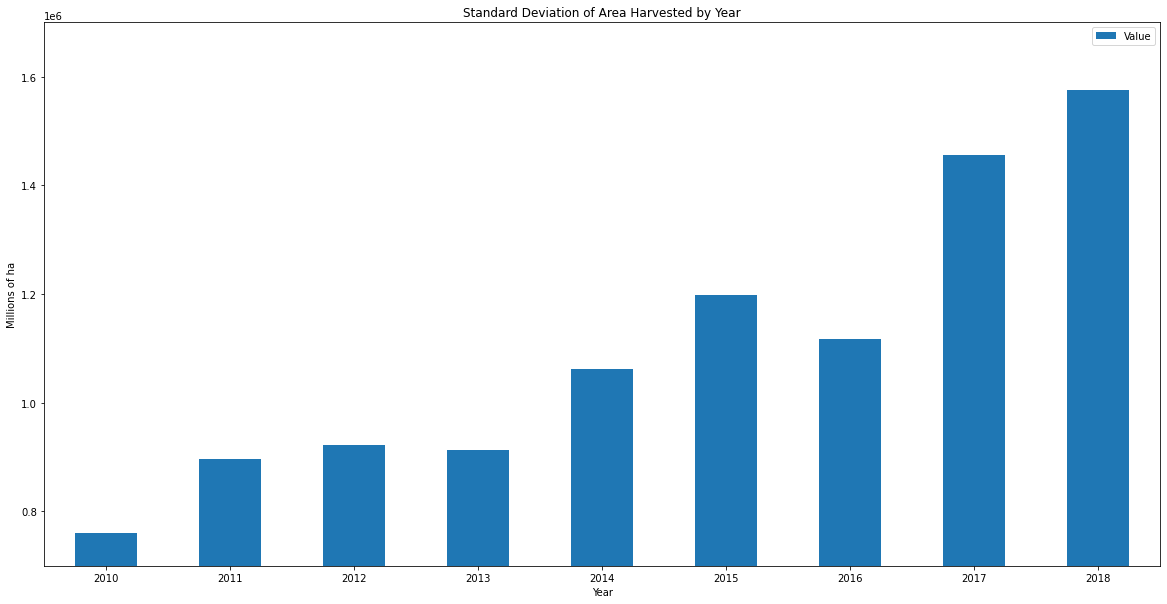

In [24]:
area_harvested_std_plot = area_harvested_std.plot(kind='bar', figsize=(20,10), rot=0, ylabel='Millions of ha',
                                                  title='Standard Deviation of Area Harvested by Year',
                                                  ylim=(700000, 1700000))

In [25]:
yield_path = Path('/Users', 'tylerhubbard', 'umnfintech', 'project1_group3', 'Resources', 'fao_yield.csv')
fao_yield = pd.read_csv(yield_path, index_col=['Area', 'Year'])
fao_yield = fao_yield.drop(columns=['Domain Code', 'Domain', 'Area Code (FAO)', 'Element Code', 'Item Code (FAO)',
                                  'Item', 'Year Code', 'Flag', 'Flag Description', 'Element', 'Unit'])
fao_yield

Value
Area          Year       
Cameroon      2010   3941
              2011   3582
              2012   4014
              2013   4104
              2014   3769
              2015   4039
              2016   4050
              2017   4104
              2018   4119
Côte d'Ivoire 2010   5711
              2011   5628
              2012   5411
              2013   5305
              2014   5310
              2015   5194
              2016   5157
              2017   5040
              2018   4848
Ecuador       2010   3669
              2011   5612
              2012   3417
              2013   3192
              2014   4192
              2015   4170
              2016   3909
              2017   4407
              2018   4685
Ghana         2010   3950
              2011   4374
              2012   5495
              2013   5221
              2014   5100
              2015   5100
              2016   5100
              2017   5190
              2018   5299
Nigeria       2010   3137
              2011   3150
              2012   3024
              2013   2960
              2014   2882
              2015   2858
              2016   2841
              2017   2815
              2018   2780

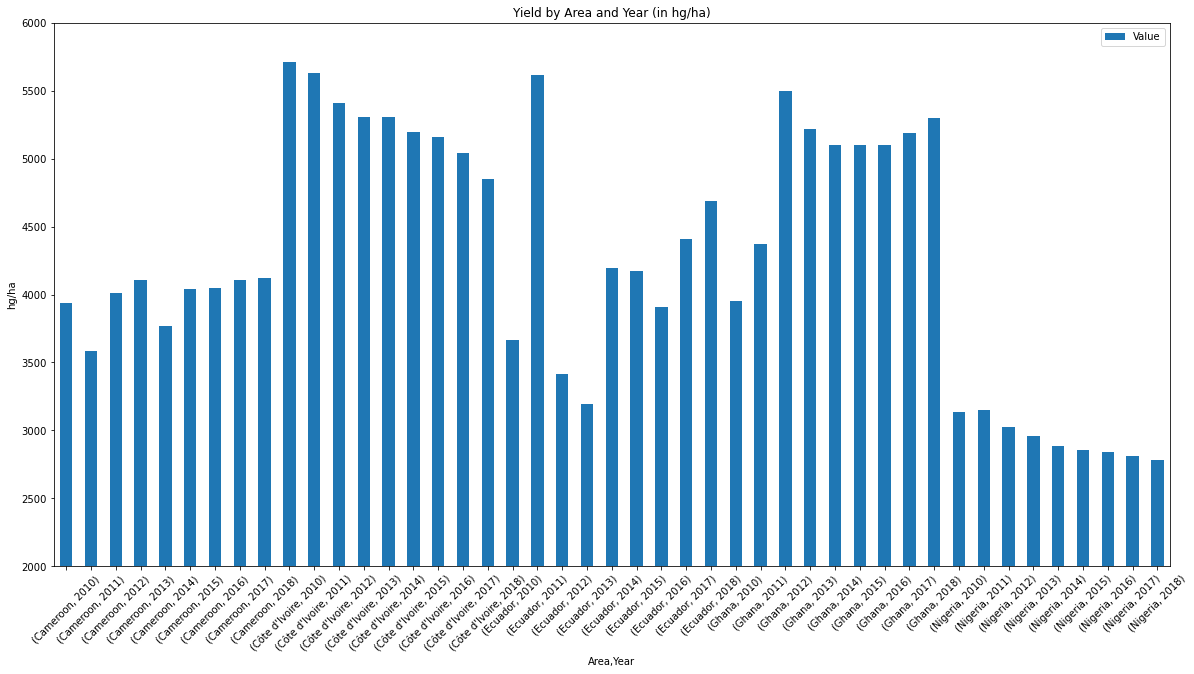

In [26]:
fao_yield_plot = fao_yield.plot(kind='bar', figsize=(20,10), ylim=(2000,6000), ylabel='hg/ha',
                               title='Yield by Area and Year (in hg/ha)', rot=45)

In [27]:
yield_mean = fao_yield.groupby(by=['Year'], dropna=False).mean()
yield_min = fao_yield.groupby(by=['Year'], dropna=False).min()
yield_max = fao_yield.groupby(by=['Year'], dropna=False).max()
yield_std = fao_yield.groupby(by=['Year'], dropna=False).std()

<AxesSubplot:title={'center':'Average Yield by Year'}, xlabel='Year', ylabel='hg/ha'>

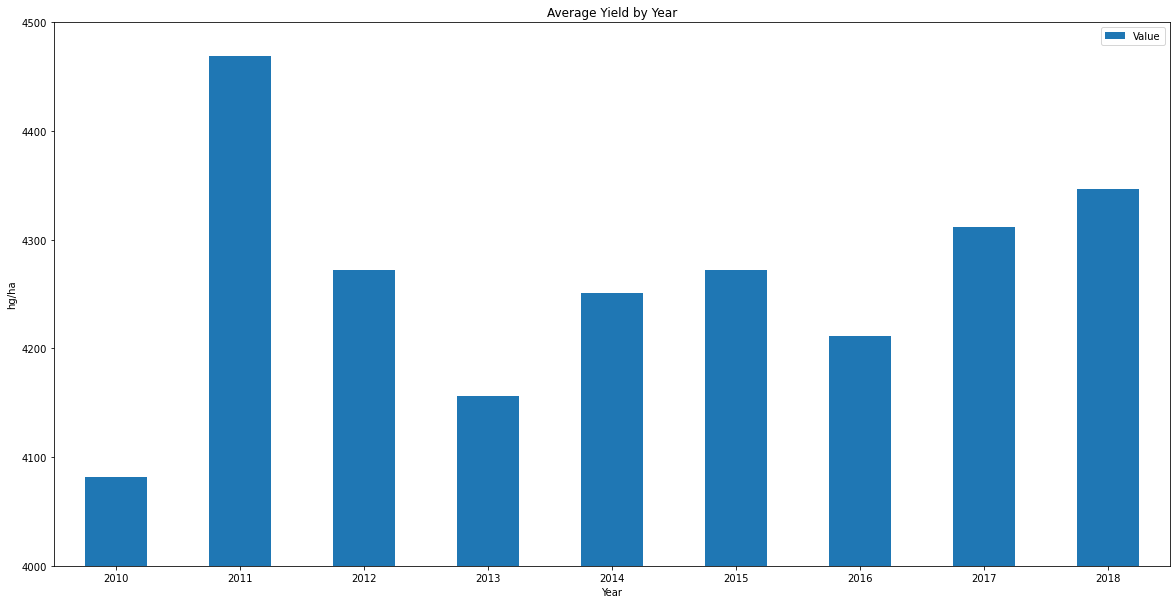

In [28]:
yield_mean_plot = yield_mean.plot(kind='bar', figsize=(20,10), rot=0, title='Average Yield by Year',
                                  ylabel = 'hg/ha', ylim=(4000, 4500))
yield_mean_plot

<AxesSubplot:title={'center':'Minimum Yield by Year'}, xlabel='Year', ylabel='hg/ha'>

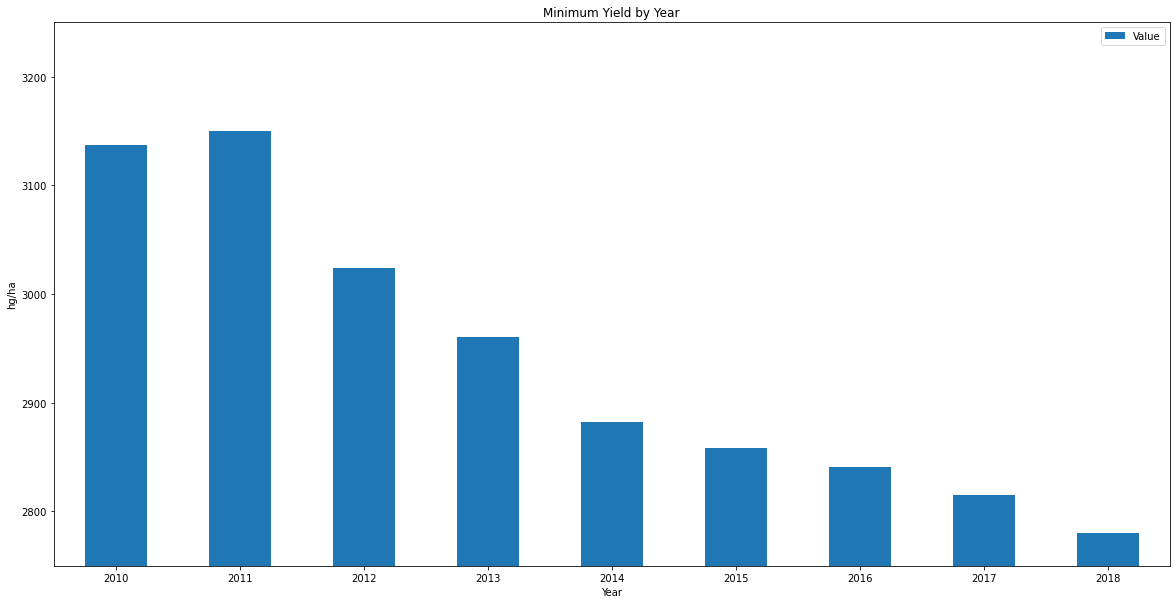

In [29]:
yield_min_plot = yield_min.plot(kind='bar', figsize=(20,10), ylabel='hg/ha', rot=0,
                                title='Minimum Yield by Year', ylim=(2750, 3250))
yield_min_plot

<AxesSubplot:title={'center':'Maximum Yield by Year'}, xlabel='Year', ylabel='hg/ha'>

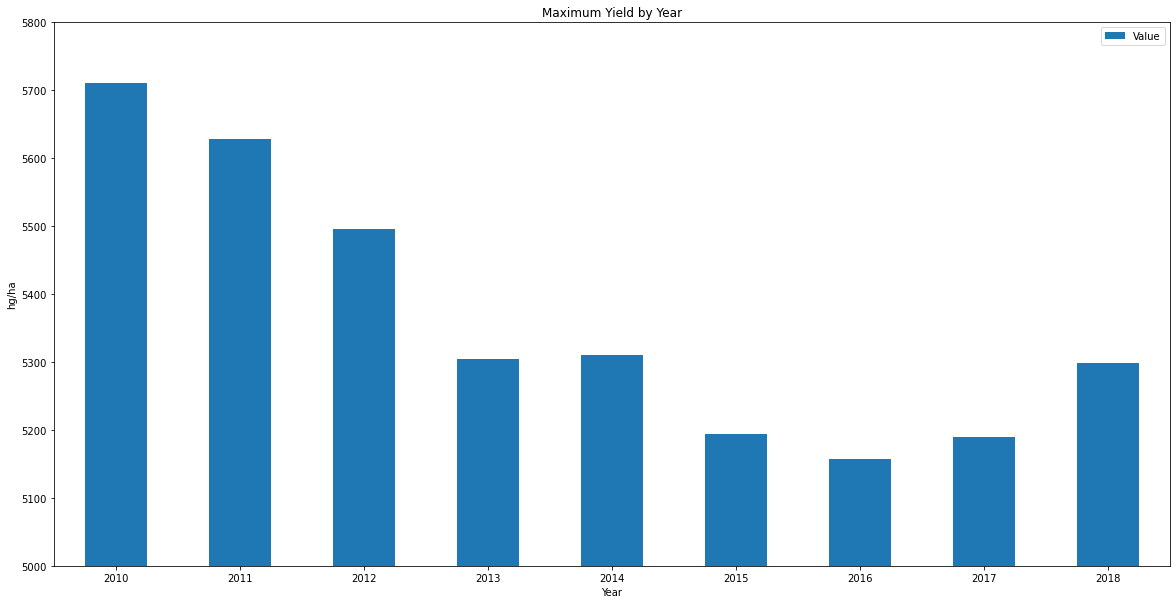

In [30]:
yield_max_plot = yield_max.plot(kind='bar', figsize=(20,10), rot=0, ylabel='hg/ha',
                                title='Maximum Yield by Year', ylim=(5000, 5800))
yield_max_plot

<AxesSubplot:title={'center':'Standard Deviation By Year'}, xlabel='Year', ylabel='hg/ha'>

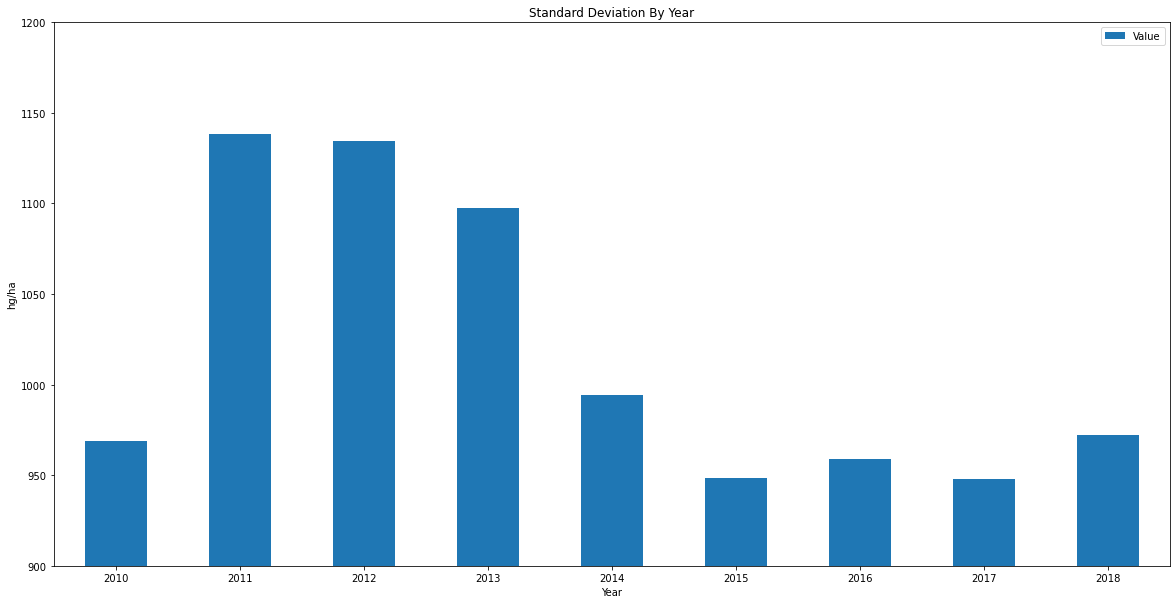

In [31]:
yield_std_plot = yield_std.plot(kind='bar', figsize=(20,10), rot=0, ylabel='hg/ha', 
                                title = 'Standard Deviation By Year', ylim=(900, 1200))
yield_std_plot

In [32]:
joined_production_1 = pd.concat([production_df, fao_area], axis='columns', join='inner')
joined_production_1 = joined_production_1.rename(columns={'Value' : 'Area (ha)'})
joined_production = pd.concat([joined_production_1, fao_yield], axis='columns', join='inner')
joined_production = joined_production.rename(columns={'Value' : 'Yield (hg/ha)'})
joined_production

Crops (tonnes)  Area (ha)  Yield (hg/ha)
         Year                                           
Cameroon 2010           264077     670000           3941
         2011           240000     670000           3582
         2012           268941     670000           4014
         2013           275000     670000           4104
         2014           271297     714261           3769
         2015           274939     767555           4039
         2016           293169     520947           4050
         2017           300511     599844           4104
         2018           307867     606649           4119
Ecuador  2010           132099     360025           3669
         2011           224163     399467           5612
         2012           133323     390176           3417
         2013           128446     402434           3192
         2014           156216     372637           4192
         2015           180192     432094           4170
         2016           177551     454257           3909
         2017           205955     467327           4407
         2018           235182     501950           4685
Ghana    2010           632037    1600200           3950
         2011           700020    1600300           4374
         2012           879348    1600300           5495
         2013           835466    1600300           5221
         2014           858720    1683765           5100
         2015           858720    1683765           5100
         2016           858720    1683765           5100
         2017           893598    1867648           5190
         2018           947632    1707146           5299
Nigeria  2010           399200    1272430           3137
         2011           391000    1241329           3150
         2012           383000    1266347           3024
         2013           367000    1239750           2960
         2014           329870    1144659           2882
         2015           302066    1056893           2858
         2016           298029    1048945           2841
         2017           324391    1154654           2815
         2018           332927    1222844           2780

In [33]:
joined_mean_data = pd.concat([production_mean, area_harvested_mean], axis='columns', join='inner')
joined_mean_data = joined_mean_data.rename(columns={'Value' : 'Area Harvested (ha)'})
joined_mean = pd.concat([joined_mean_data, yield_mean], axis='columns', join='inner')
joined_mean = joined_mean.rename(columns={'Value' : 'Yield (hg/ha)'})
joined_mean

,Crops (tonnes),Area Harvested (ha),Yield (hg/ha)
Year,,,
2010,"545,752.00","1,236,288.20","4,081.60"
2011,"613,287.60","1,319,243.40","4,469.20"
2012,"630,098.80","1,334,580.60","4,272.20"
2013,"610,980.80","1,328,779.00","4,156.40"
2014,"646,788.80","1,399,964.00","4,250.60"
2015,"682,383.40","1,479,694.00","4,272.20"
2016,"652,293.80","1,375,332.60","4,211.40"
2017,"751,691.00","1,624,987.80","4,311.20"
2018,"757,511.40","1,679,538.60","4,346.20"


In [34]:
production_correlation = joined_mean.corr()
production_correlation

,Crops (tonnes),Area Harvested (ha),Yield (hg/ha)
Crops (tonnes),1.00,0.98,0.49
Area Harvested (ha),0.98,1.00,0.43
Yield (hg/ha),0.49,0.43,1.00


<AxesSubplot:>

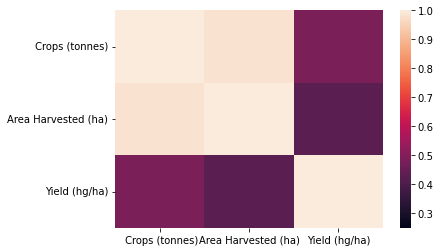

In [36]:
import seaborn as sns
sns.heatmap(production_correlation, vmin=0.25, vmax=1)